In [2]:

import matplotlib.pyplot as plt
from sympy.solvers import solve
import sympy as sp
import numpy as np

In [21]:
L1 = 1.15 #meters (about 4 feet)
L2 = 1.78 #meters (about 8.5 feet)
M = 200/2.2 #a tiny bit of overlap at corner, very small, I'm ignoring it
g = 9.81 #m/s2
CM_x0 = 0.244 # meters
CM_y0 = 1.357 # meters
max_theta = 35*np.pi/180 # rad
angles = np.linspace(0, max_theta, 10)
angles_deg = angles*(180/np.pi)

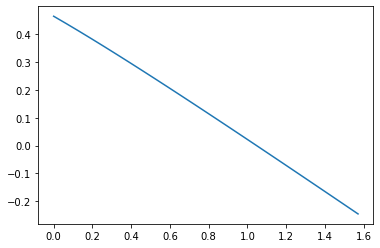

In [22]:
phi = sp.Symbol('phi')
d = 1
h1 = 0.5
h2 = 1

"""
Get actuator angle from wall angle, actuator mounting heights, distance of actuator from base
"""
def get_phi(theta, height1, height2, base_dist):
    return (solve(sp.tan(phi)-(1/base_dist)*(height2*sp.cos(theta)-height1-height2*sp.sin(theta)*sp.tan(phi)), phi))

#check relationship. Given above geometry, tan(phi)=1/2 for theta=0 and tan(phi)=-1/4 for theta = pi/2
ph = []
th = np.linspace(0, np.pi/2, 25)
for t in th:
    ph.append(get_phi(t, h1, h2, d)[0])
    
plt.plot(th,ph);

In [23]:
"""
Get X pos of center of mass from wall angle
Dependent on L1 and L2 (AMES dimensions)
"""
def get_Xcm(theta):
    return CM_x0*np.cos(-theta) - CM_y0*np.sin(-theta)

"""
Gets the actuator and hinge loads give system geometry (wall angle, 
height of actuator mounting points, distance of actuator from base, 
weight of walls)

Depends on L1 and L2 (dimensions of walls)
These are less flexible parameters (determined byt AMES width and
height), so they are configured at the top

Order of solution vector is actuator load, hinge x reaction, hinge y reaction
"""
def get_loads(theta, height1, height2, base_dist, W):
    act_ang = np.float64(get_phi(theta, height1, height2, base_dist)[0])
    A = np.array([
        [np.sin(act_ang), -1, 0],
        [-np.cos(act_ang), 0, 1],
        [height2*(np.cos(act_ang)*np.cos(theta)-np.sin(act_ang)*np.sin(theta)), 0, 0]
        ])
    B = np.array([0, 
                  W, 
                  get_Xcm(theta)*W
                 ])
    X = np.linalg.inv(A).dot(B)
    return X

In [8]:
get_loads(0, h1, h2, d, M*g)

array([ 243.28826153,  108.80181818, 1109.42181818])

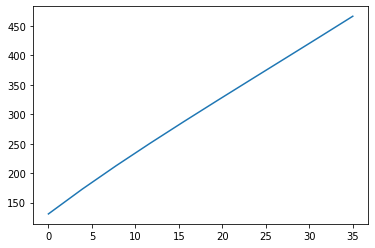

In [34]:
"""
Check a single load profile given a geometry
h1 is actuator base height
h2 is actuator mounting height on panel
d is horizontal distance from actuator base to hinge
"""
actuator_loads = []
hinge_x_loads = []
hinge_y_loads = []
h1=0.3
h2=1.3
d=0.3

for th in angles:
    loads = get_loads(th, h1, h2, d, M*g)
    actuator_loads.append(loads[0])
    hinge_x_loads.append(loads[1])
    hinge_y_loads.append(loads[2])
actuator_loads_lbs = [(2.2/9.81)*l for l in actuator_loads]
plt.plot(angles_deg, actuator_loads_lbs)

In [39]:
"""
Create a collection of load profiles for varying base heights (h1)
"""
h2 = 0.870
d = 0.4

all_actuator_loads = []
all_hinge_x_loads = []
all_hinge_y_loads = []
base_heights = []
for h1 in np.linspace(0, 0.5, 6):
    actuator_loads = []
    hinge_x_loads = []
    hinge_y_loads = []
    for th in angles:
        loads = get_loads(th, h1, h2, d, M*g)
        actuator_loads.append(loads[0])
        hinge_x_loads.append(loads[1])
        hinge_y_loads.append(loads[2])
    all_actuator_loads.append(actuator_loads)
    all_hinge_x_loads.append(hinge_x_loads)
    all_hinge_y_loads.append(hinge_y_loads)
    base_heights.append(h1)

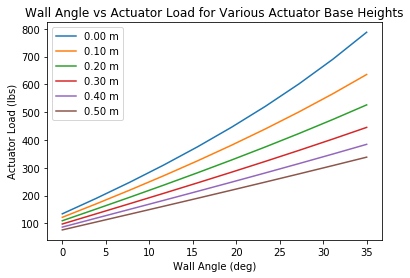

In [40]:
for load, height in zip(all_actuator_loads, base_heights):
    load_lbs = [l*(2.2/9.81) for l in load]
    plt.plot(angles_deg, load_lbs, label="{:.2f} m".format(height))

plt.legend()
plt.xlabel("Wall Angle (deg)")
plt.ylabel("Actuator Load (lbs)")
plt.title("Wall Angle vs Actuator Load for Various Actuator Base Heights")
plt.savefig("Jewelry Box Plots/base_heights.jpg")

In [41]:
"""
Create a collection of load profiles for varying mounting heights (h2)
"""
h1 = 0.2
d = 0.4

all_actuator_loads = []
all_hinge_x_loads = []
all_hinge_y_loads = []
base_heights = []
for h2 in np.linspace(0.5, 1, 6):
    actuator_loads = []
    hinge_x_loads = []
    hinge_y_loads = []
    for th in angles:
        loads = get_loads(th, h1, h2, d, M*g)
        actuator_loads.append(loads[0])
        hinge_x_loads.append(loads[1])
        hinge_y_loads.append(loads[2])
    all_actuator_loads.append(actuator_loads)
    all_hinge_x_loads.append(hinge_x_loads)
    all_hinge_y_loads.append(hinge_y_loads)
    base_heights.append(h2)

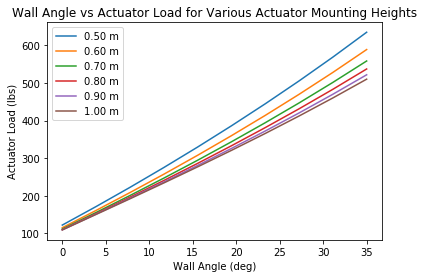

In [42]:
for load, height in zip(all_actuator_loads, base_heights):
    load_lbs = [l*(2.2/9.81) for l in load]
    plt.plot(angles_deg, load_lbs, label="{:.2f} m".format(height))

plt.legend()
plt.xlabel("Wall Angle (deg)")
plt.ylabel("Actuator Load (lbs)")
plt.title("Wall Angle vs Actuator Load for Various Actuator Mounting Heights")
plt.savefig("Jewelry Box Plots/mount_heights.jpg")

In [43]:
"""
Create a collection of load profiles for varying base distances (d)
"""
h1 = 0.2
h2 = 0.87

all_actuator_loads = []
all_hinge_x_loads = []
all_hinge_y_loads = []
distances = []
for d in np.linspace(0.1, 0.6, 6):
    actuator_loads = []
    hinge_x_loads = []
    hinge_y_loads = []
    for th in angles:
        loads = get_loads(th, h1, h2, d, M*g)
        actuator_loads.append(loads[0])
        hinge_x_loads.append(loads[1])
        hinge_y_loads.append(loads[2])
    all_actuator_loads.append(actuator_loads)
    all_hinge_x_loads.append(hinge_x_loads)
    all_hinge_y_loads.append(hinge_y_loads)
    distances.append(d)

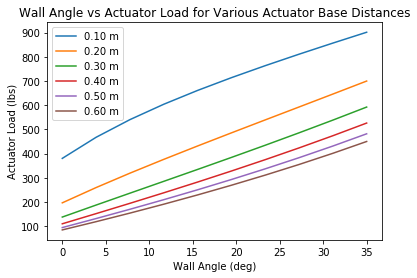

In [44]:
for load, dist in zip(all_actuator_loads, distances):
    load_lbs = [l*(2.2/9.81) for l in load]
    plt.plot(angles_deg, load_lbs, label="{:.2f} m".format(dist))

plt.legend()
plt.xlabel("Wall Angle (deg)")
plt.ylabel("Actuator Load (lbs)")
plt.title("Wall Angle vs Actuator Load for Various Actuator Base Distances")
plt.savefig("Jewelry Box Plots/base_dists.jpg")